# Определение потенциально популярной игры

Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

**Какие этапы работы были проделаны:**

1. Изучение данных из файла - просмотрели общую информацию по таблицам, чтобы понять, с чем имеем дело
2. Предобработка данных - подготовили данные для дальнейшего анализа
3. Анализ данных - провели анализ, где углубились в цифры
4. Проверка гипотез - у нас было 2 гипотезы, которые мы проверили
5. Общий вывод - составили общий вывод по проекту

## Изучение данных из файла

In [1]:
#Для начала импортируем библиотеки, которые нам потребуются для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#Откроем датасет и посмотрим первые 5 строчек
try:
    df = pd.read_csv('/Users/alekseivlasov/Desktop/project/5/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
    
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#Просмотрим общую информацию о таблице 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

У нас таблица, которая состоит из 10 столбцов и 16715 строчек, данных достаточно для анализа

Есть пропуски, с которыми нужно будет поработать. Все столбцы названы неправильно, это тоже мы исправим, и некоторые столбцы нужно привести к другому типу данных

## Предобработка данных

Для начала, приведем название таблиц в нужный вид, сделать это мы можем через метод ``str.lower()``

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Работа с пропусками

Для дальнейшего исследования нужно проработать пропуски и заполнить их

In [5]:
#Посмотрим, в каких столбцах есть пропуски
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
df.shape

(16715, 11)

В столбцах ``name``, ``year_of_release`` и ``genre`` есть незначительное количество пропусков (меньше 2%), которые мы просто удалим

In [7]:
df = df.dropna(subset=['name', 'year_of_release', 'genre'])

In [8]:
df.shape

(16444, 11)

**Изучим оставшиеся пропуски**

In [9]:
#Изучим столбец critic_score
df['critic_score'].value_counts(dropna=False)

NaN     8461
70.0     252
71.0     248
75.0     240
80.0     235
        ... 
20.0       3
29.0       3
21.0       1
17.0       1
13.0       1
Name: critic_score, Length: 82, dtype: int64

In [10]:
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Пропущенно много значений, но средним заменить в данной ситуцации не получится, так как мы разбираем уникальный продукт, игры все разные и оценки тоже будут абсолютно разные  
Принято решение заменить пропуски специальным символом ``-1``

In [11]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [12]:
#Изучим столбец user_score
df['user_score'].value_counts(dropna=False)

NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.9       2
9.6       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [13]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Аббревиатура ``tbd`` означает, что пользователь воздержался от оценки, в нашем случае можно расценивать это как пропуск 

In [14]:
#Заменим tbd на специальное значение
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')

#Заменим пропуски специальным символом
df['user_score'] = df['user_score'].fillna(-1)

In [15]:
#Изучим столбец rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинг тоже нельзя просто заменить средним, поэтому определим специальным символом ``unknown``

In [16]:
df['rating'] = df['rating'].fillna('unknown')

In [17]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Вывод

В столбцах ``critic_score``, ``user_score`` и ``rating`` было принято решение поставить заглушки, так как пропуски занимают половину от всего датасета - мы не можем просто удалить строки, а заменить средним тоже будет неправильно

Причина пропусков может быть простая: у игры нет оценок от критика или пользователя - получается пропуск, в ситуации с рейтингом - у игры может не быть рейтинга, поэтому тоже получается пропуск

В столбце ``user_score`` была обнаружена аббревиатура ``tbd`` - она означает, что пользователь воздержался от оценки или решил поставить ее позже, в нашем случае это пропуск 

Так много пропусков может быть по причине того, что в Японии рейтинги и оценки не сильно популярны, которые используются в этом датасете

### Преобразование типы данных

Поменяем тип данных в столбце ``year_of_release``, так как в этом столбце могут быть только целые значения  
У нас еще есть столбцы с оценками: ``critic_score`` - нужно заменить на ``int`` и ``user_score`` - который заменим на ``float``

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [19]:
list_int = ['year_of_release', 'critic_score']

for i in list_int:
    df[i] = df[i].astype('int')
    
df['user_score'] = df['user_score'].astype('float')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Заменили типы данных на нужные

**Посчитаем суммарные продажи по всем регионам**

In [20]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


Попробуем найти неявные дубликаты в датасете

In [21]:
#Посмтрим на уникальные значения столбца platform
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

## Анализ данных

Для начала посмотрим, сколько игр выпускалось в разные годы

In [22]:
games_in_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
games_in_year.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


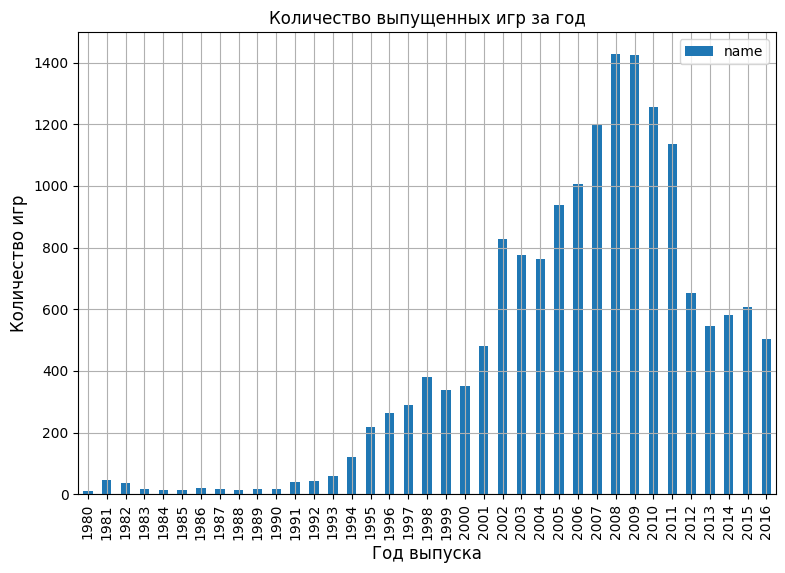

In [23]:
#Построим график
games_in_year.plot(kind='bar', x='year_of_release', y='name', figsize=(9,6), grid=True);
plt.title('Количество выпущенных игр за год')
plt.ylabel('Количество игр', fontsize=12)
plt.xlabel('Год выпуска', fontsize=12);

По графику мы видим, что рост выпуска игр начался с 1994 года, а пик пришелся на 2008 и 2009 года  
С 2012 года мы наблюдаем просадку по количеству выпущенных игр в 2 раза от пика

Сейчас у нас выделяются 3 явных этапа развития индустрии: рост до 2008 года, пик 2008 и 2009 годов, а также сокращение рынка последних годов.  

Данные важны за весь период, именно так мы можем рассмотреть всю картинку, которая происходит в индустрии  
Чем больше данных, тем лучше

**Давайте посмотрим, как менялись продажи по платформам**

In [24]:
#Найдем топ-10 платформ
top_platforms = df.pivot_table(index='platform', values='sales', aggfunc='sum')
top_platforms = top_platforms.sort_values(by='sales', ascending=False).head(10)
top_platforms = top_platforms.index.values
top_platforms

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

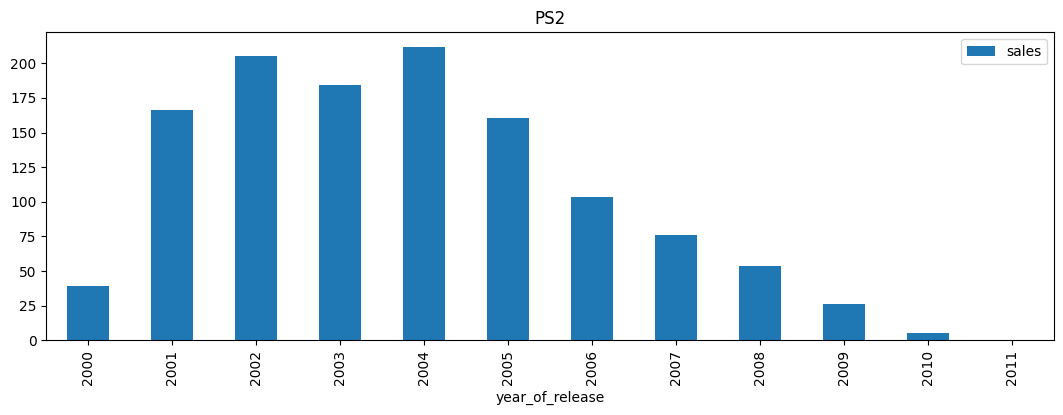

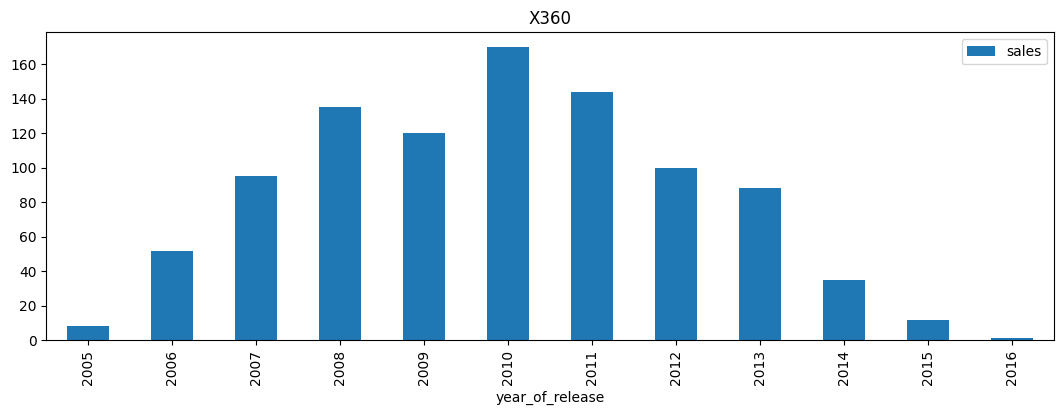

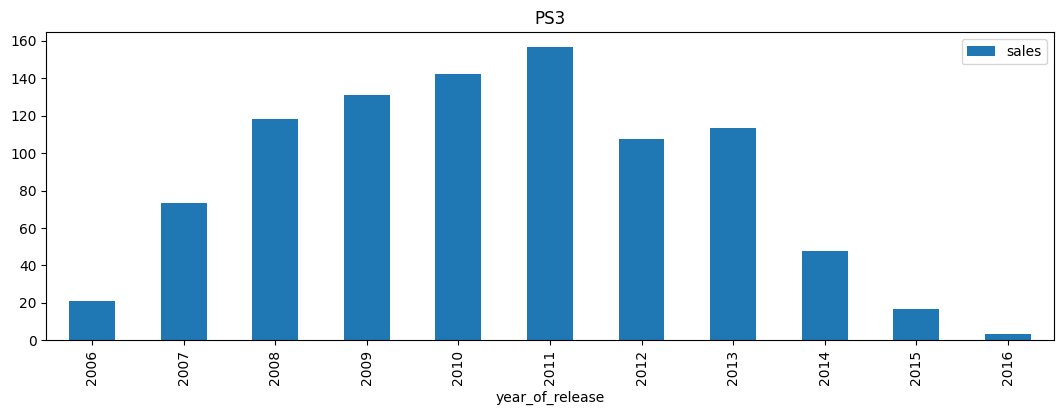

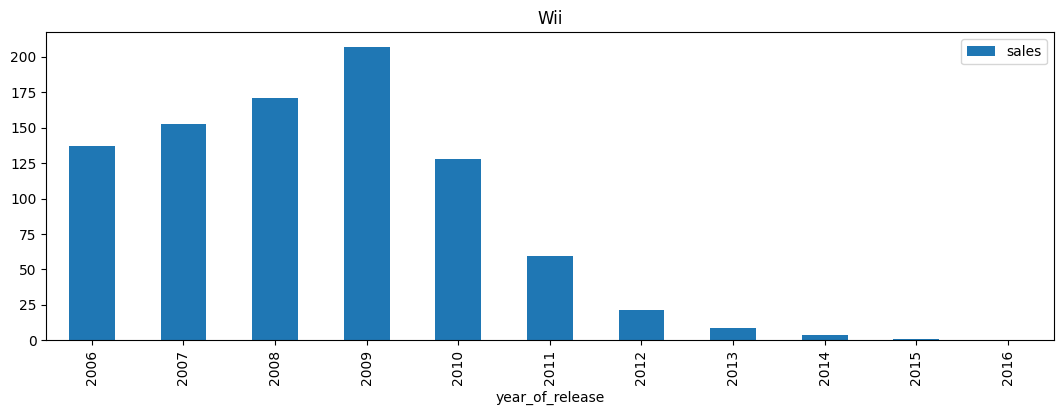

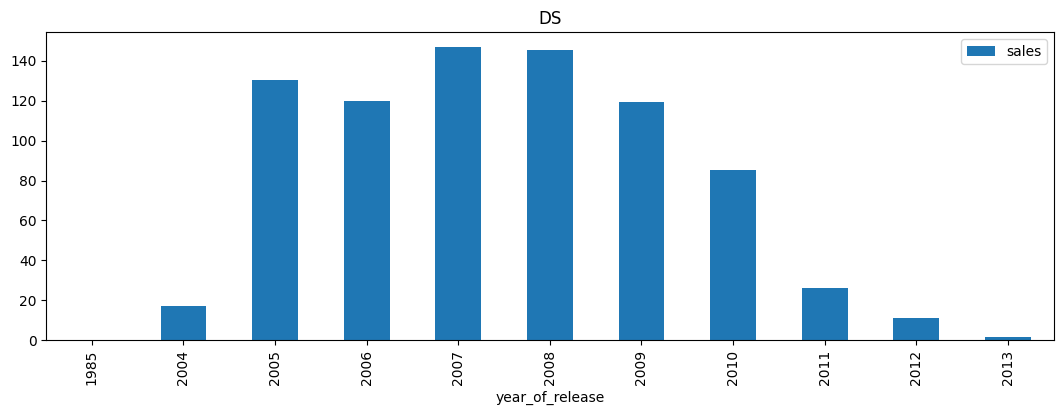

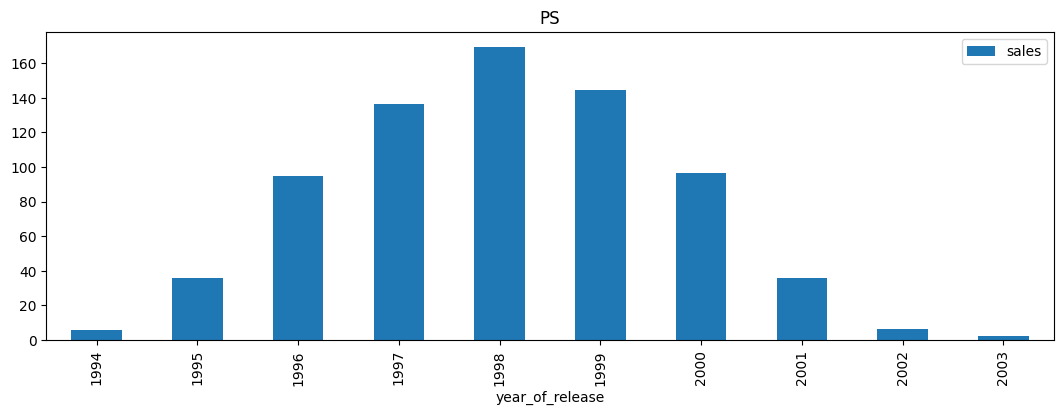

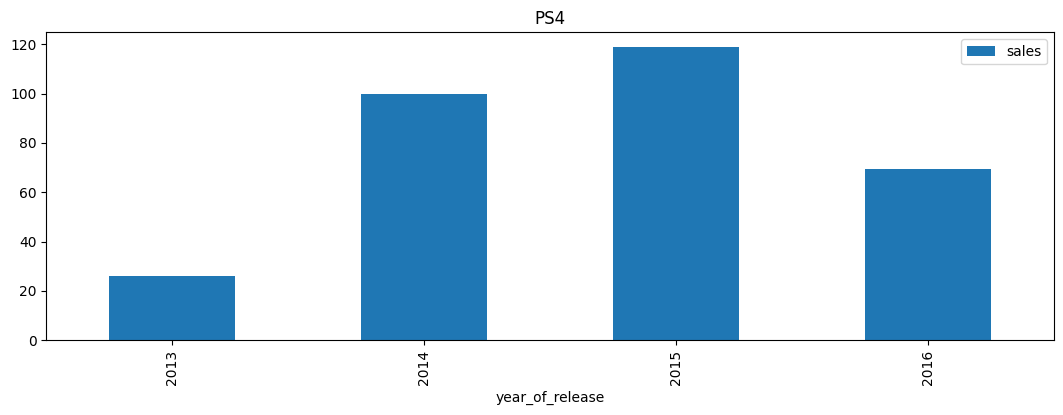

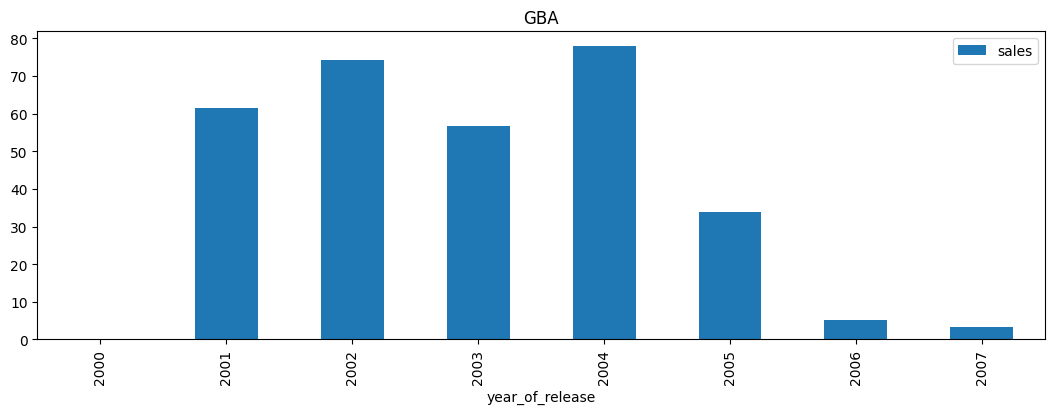

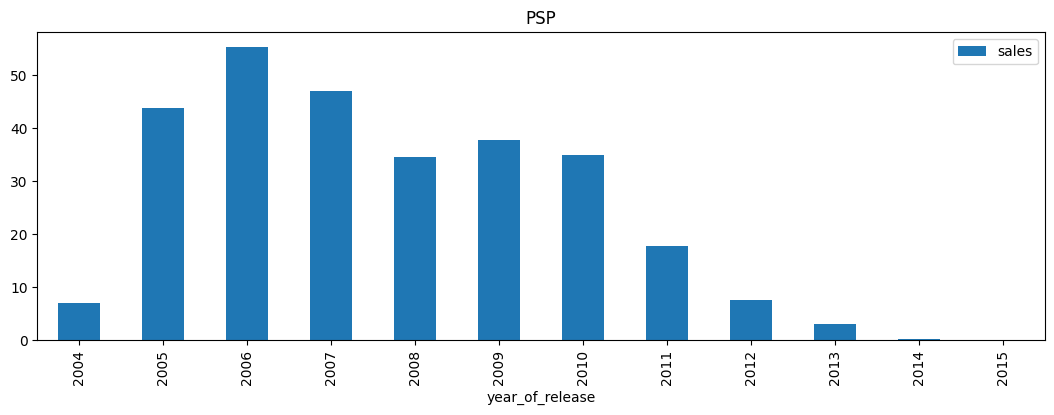

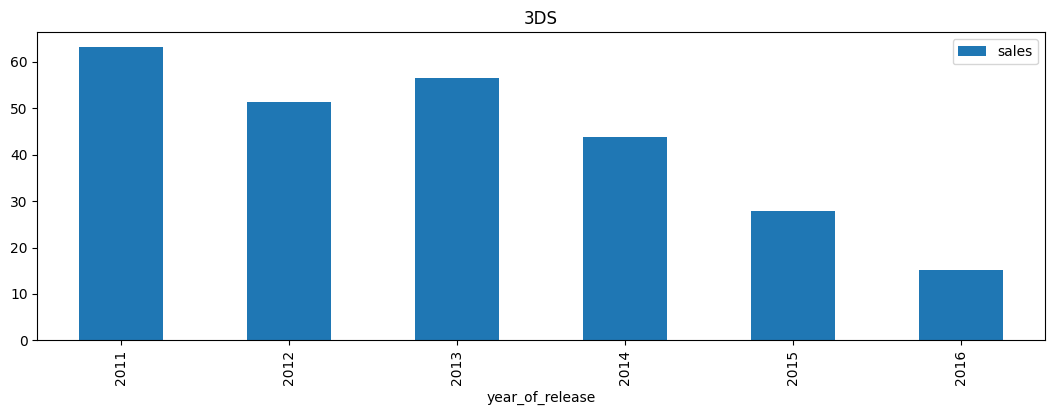

In [25]:
#Построим распределения по годам для каждой платформы.
for platform in top_platforms:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

**Вывод**

- Отталкиваясь от диаграмм распределения, можно сделать вывод, что средний период 'жизни' платформ длится 8-10 лет.


**Определим период, за который нужно взять данные для дальнейшего исследования**

Сейчас у нас выделяются 3 явных этапа развития индустрии: рост до 2008 года, пик 2008 и 2009 годов, а также сокращение рынка последних годов.  
Также большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут.  
Поэтому будем рассматривать последнй 3 года из датафрейма

In [26]:
df_actual = df[df['year_of_release'] > 2013]
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,unknown,7.98


Посмотрим, сколько платформ у нас осталось за актуальный период и какие из них являются лидерами рынка

In [27]:
df_actual['platform'].value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

Для анализа мы определим самые последнии версии платформ, чтобы данные были актуальны  

In [28]:
#Составим список из последних версий платформ
top_list = ['PS4', 'XOne', 'PC', 'WiiU', '3DS', 'PSV']

#Сделаем датафрейм по актуальным платформам
top_actual_platforms = df_actual[df_actual['platform'].isin(top_list)]
top_actual_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,unknown,7.98


Отрисуем ящик с усами

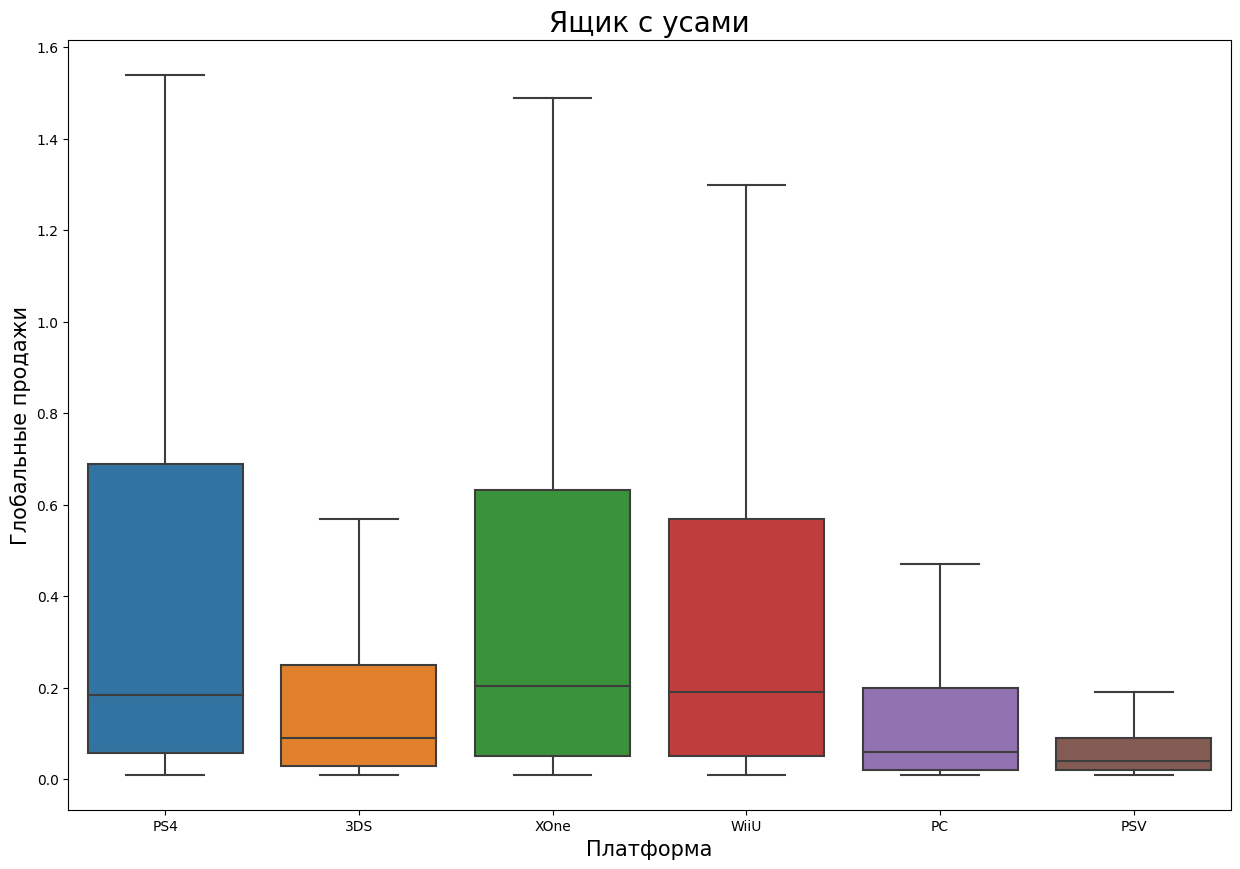

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(data=top_actual_platforms, x='platform', y='sales', showfliers=False)
plt.title('Ящик с усами', fontsize=20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Глобальные продажи',fontsize=15);

Посмотрим на данные поближе

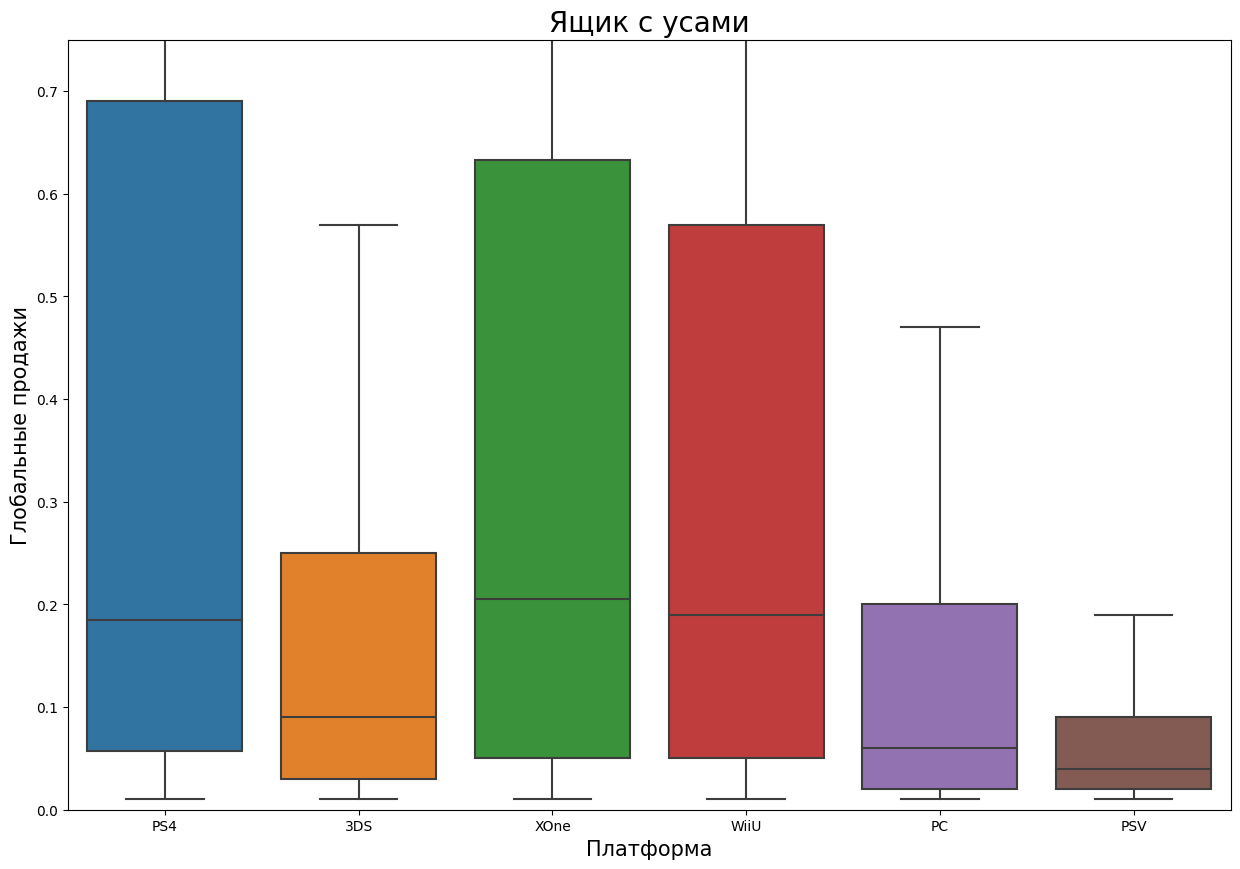

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(data=top_actual_platforms, x='platform', y='sales', showfliers=False)
plt.ylim(0, 0.75)
plt.title('Ящик с усами', fontsize=20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Глобальные продажи',fontsize=15);

**Вывод**

* На графике мы видим, что медианное значение у всех разное
* Больше всех продаж у PS4, а на последнем месте PSV
* Видная явная тройка лидеров рынка на актуальный период: PS4, Xone и WiiU

**Давайте посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

Для примера возьмем PS4

In [31]:
#Для начала посмотрим корреляцию между отзывами пользователей и продажами
ps4 = df_actual[df_actual['platform'] == 'PS4']
ps4 = ps4[ps4['user_score'] != -1] #уберем строки со специльным символом
ps4['user_score'].corr(ps4['sales'])

-0.040131589472697266

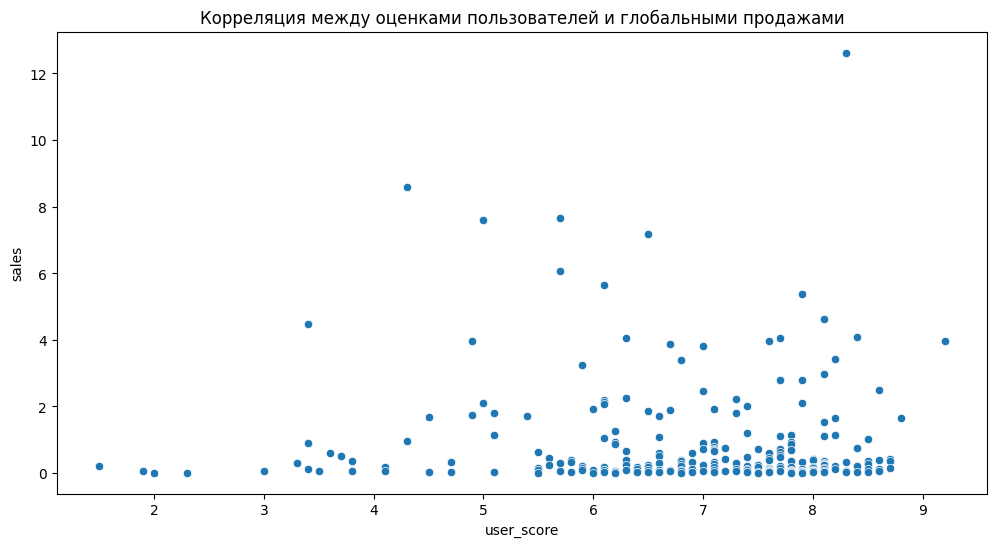

In [32]:
#Посмтроим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='sales', data=ps4)
plt.title('Корреляция между оценками пользователей и глобальными продажами');

Корреляцию между оценками пользователей и проадажами не обнаружили

In [33]:
#Посмотрим корреляцию между отзывами критиков и продажами
ps4 = ps4[ps4['critic_score'] != -1]
ps4['critic_score'].corr(ps4['sales'])

0.40190287811475306

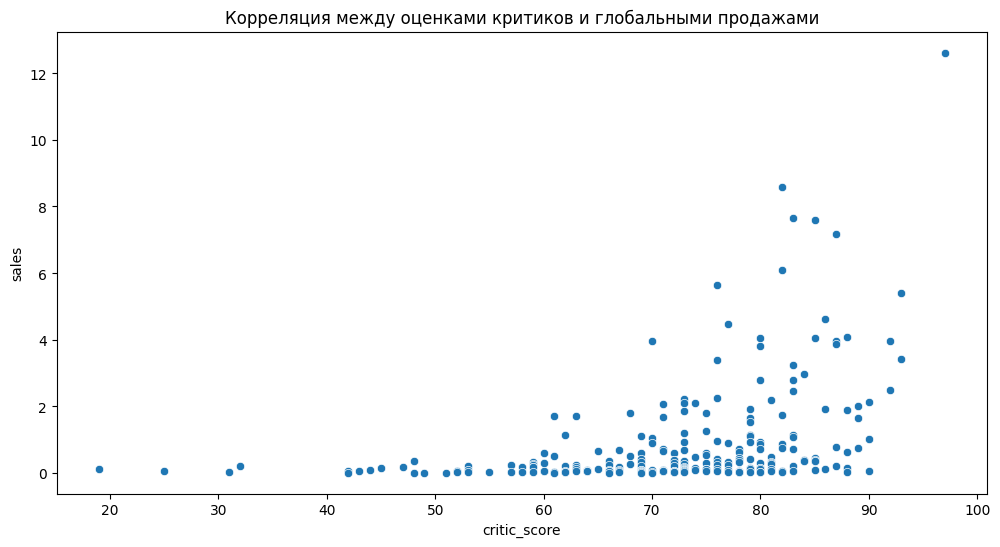

In [34]:
#Построим даграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='sales', data=ps4)
plt.title('Корреляция между оценками критиков и глобальными продажами');

**Вывод**

- Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. 
- Оценки пользователей корреляции с продажами не имеют

**Давайте соотнесем наш вывод с другими платформами**

In [35]:
#Для этого сделаем цикл по оценкам пользователей

name_games = ['XOne', 'PC', 'WiiU', '3DS', 'PSV'] #возьмем оставшиеся платформы из нашего актуального топа

for name in name_games:
    platform_name = df_actual[df_actual['platform'] == name]
    platform_name = platform_name[platform_name['user_score'] != -1]
    platform_name = platform_name['user_score'].corr(platform_name['sales'])
    print(f'Корреляция между оценками пользователей и продажами платформы {name} равна: {platform_name}')
    print()

Корреляция между оценками пользователей и продажами платформы XOne равна: -0.0703839280647581

Корреляция между оценками пользователей и продажами платформы PC равна: -0.07159665703472451

Корреляция между оценками пользователей и продажами платформы WiiU равна: 0.40792645792170795

Корреляция между оценками пользователей и продажами платформы 3DS равна: 0.21519327185270273

Корреляция между оценками пользователей и продажами платформы PSV равна: -0.1684550497806444



**Вывод по оценкам пользователей**

* Платформа WiiU имеет достаточно высокую, в сравнении с другими платформами корреляцию, видимо, комьюнити активно общается между собой и оценки пользователей учитываются при покупке

* На втором месте платформа 3DS, корреляция ниже чем у WiiU, но тоже отличается от остальных платформ

* Оставльный платформы корреляции практически не имеют

**Посмотрим зависимость продаж от оценок критиков**

In [36]:
for name in name_games:
    platform_name = df_actual[df_actual['platform'] == name]
    platform_name = platform_name[platform_name['critic_score'] != -1]
    platform_name = platform_name['critic_score'].corr(platform_name['sales'])
    print(f'Корреляция между оценками критиков и продажами платформы {name} равна: {platform_name}')
    print()

Корреляция между оценками критиков и продажами платформы XOne равна: 0.428676943703332

Корреляция между оценками критиков и продажами платформы PC равна: 0.1746341376935003

Корреляция между оценками критиков и продажами платформы WiiU равна: 0.3702014124808841

Корреляция между оценками критиков и продажами платформы 3DS равна: 0.31411749286905094

Корреляция между оценками критиков и продажами платформы PSV равна: 0.042664906570095286



**Вывод по оценкам критиков**

* Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж по платформам, которые разобрали

* Отличилась только PSV, она демонстрирует низкую корреляцию

**Общий вывод по корреляции**

У PS4, Xbox One, WiiU, 3DS наблюдается прямая, средне-слабая корреляция между оценками критиков и продажами. А связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет. Только у WiiU корреляция между отзывами пользователей и продажами - уверенная и даже выше, чем корреляция между отзывами критиков и игровой платформой. 

Интересное наблюдение. Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей. Но, опять же, данная аксиома не распространяется на платформу WiiU: там пользователи больше влияют на решение.

**Посмотрим на общее распределение игр по жанрам**  
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [37]:
genre_total = df_actual.pivot_table(index='genre', values='sales', aggfunc='median').sort_values(
    by='sales', ascending=False).reset_index()
genre_total

,genre,sales
0,Shooter,0.515
1,Sports,0.180
2,Platform,0.140
3,Fighting,0.125
4,Role-Playing,0.110
5,Simulation,0.100
6,Action,0.090
7,Misc,0.090
8,Racing,0.090
9,Strategy,0.060


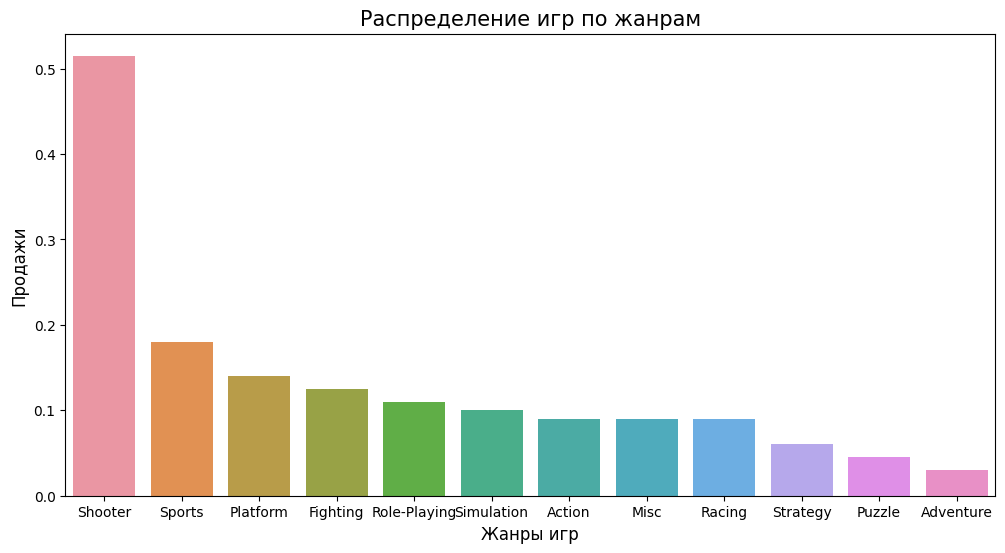

In [38]:
#Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам',fontsize=15)
sns.barplot(data=genre_total, x='genre', y='sales')
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Продажи', fontsize=12);

На первом месте, с сильным отрывом жанр **Shooter**, а на последнем месте у нас находится **Adventure**

## Портрет пользователя каждого региона

Посмотрим самые популярные платформы (топ-5) и опишем различия в долях продаж, пройдем по каждому региону

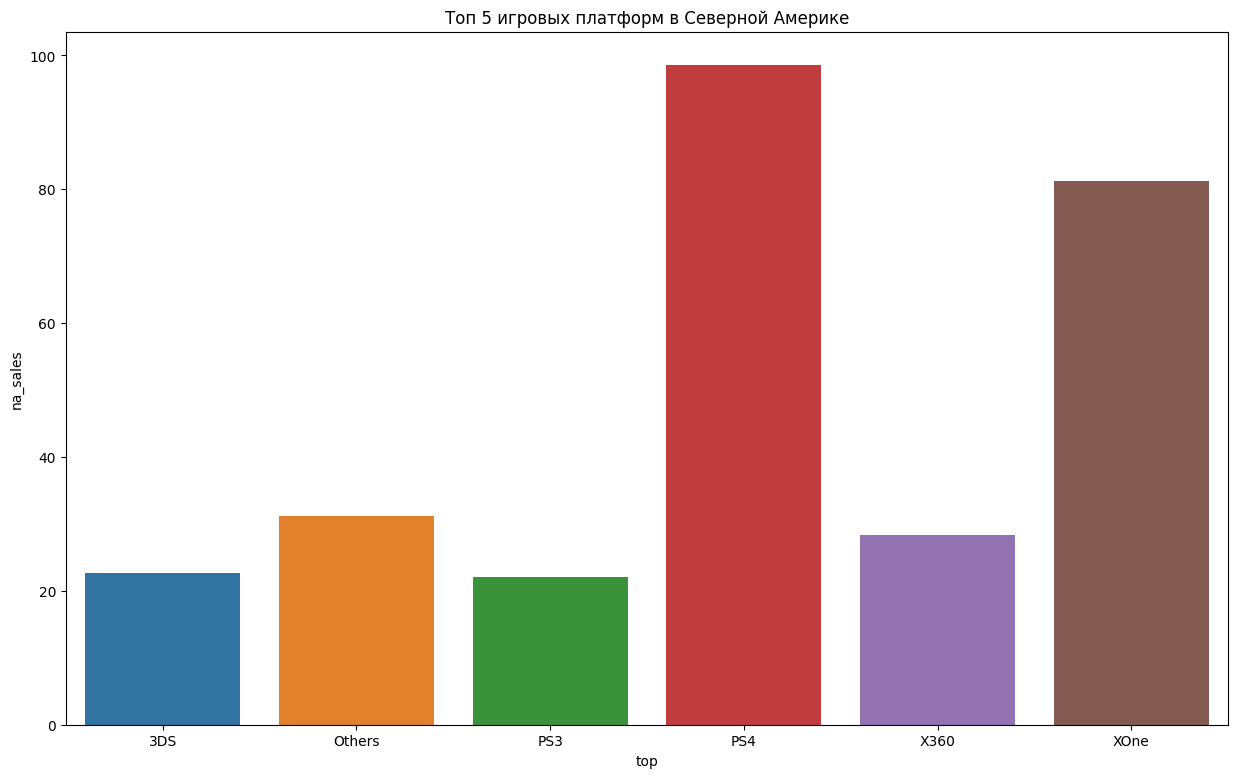

In [39]:
#Определим топ-5 платформ и другие обозначем как "другие"
na_top_platforms = df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index()
na_top_platforms = na_top_platforms.sort_values(by='na_sales', ascending=False).reset_index(drop=True)
na_top_platforms['top'] = na_top_platforms['platform']
na_top_platforms.iloc[5:, na_top_platforms.columns.get_loc('top')] = 'Others'
na_top_platforms = na_top_platforms.groupby(by='top').agg({'na_sales':'sum'}).reset_index()

#Нарисуем график
plt.figure(figsize=(15,9))
sns.barplot(data=na_top_platforms, x='top', y='na_sales')
#plt.pie(data=na_top_platforms, x='na_sales', labels='top', autopct='%.0f%%')
plt.title('Топ 5 игровых платформ в Северной Америке');

В Северной Америке самая популярная платформа 'PS4'. На втором месте идет 'XOne'- прямой конкурент 'PS4'. Третье место занимает приставка 'X360', на четвертом месте '3DS'и завершает наш топ-5 приставка 'PS3'

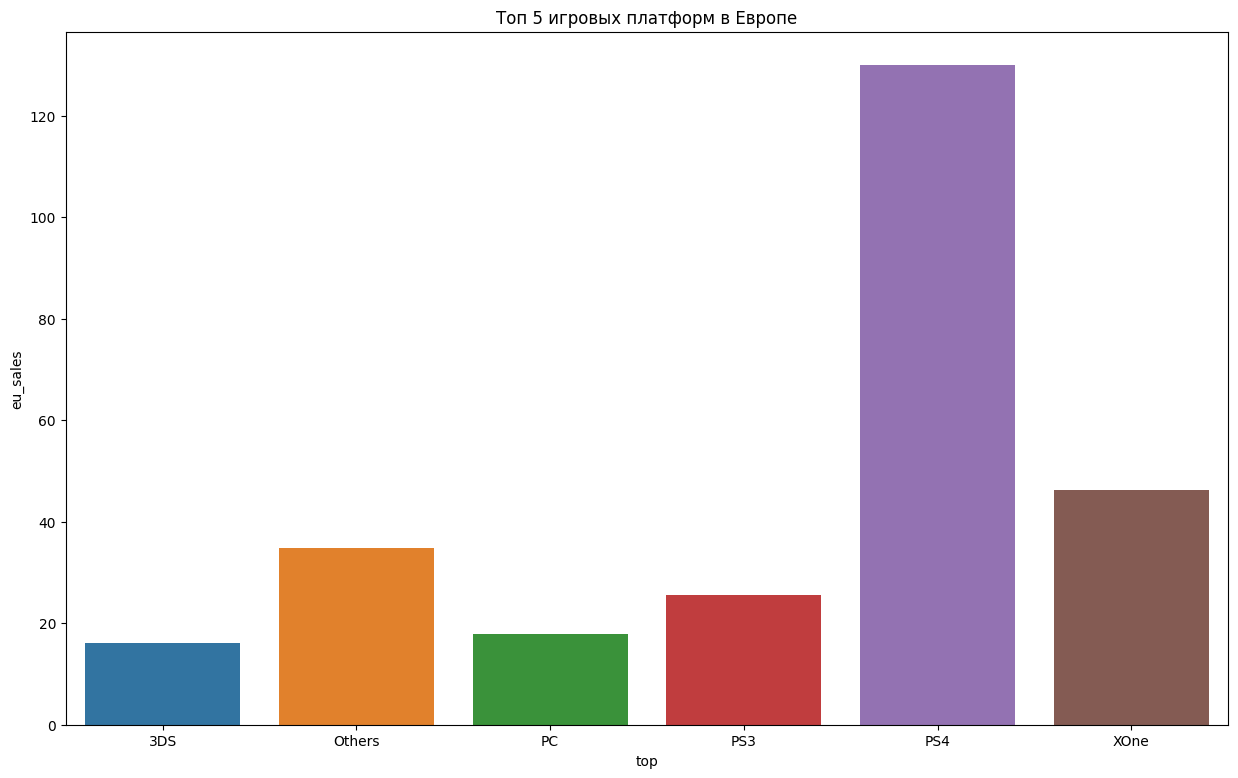

In [40]:
#Теперь посмотрим распределение в Европе
eu_top_platforms = df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index()
eu_top_platforms = eu_top_platforms.sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
eu_top_platforms['top'] = eu_top_platforms['platform']
eu_top_platforms.iloc[5:, eu_top_platforms.columns.get_loc('top')] = 'Others'
eu_top_platforms = eu_top_platforms.groupby(by='top').agg({'eu_sales':sum}).reset_index()

#Нарисуем график
plt.figure(figsize=(15,9))
sns.barplot(data=eu_top_platforms, x='top', y='eu_sales')
#plt.pie(data=eu_top_platforms, x='eu_sales', labels='top', autopct='%.0f%%')
plt.title('Топ 5 игровых платформ в Европе');

В Европе мы видим, что с большим отрывом по популярности выигрывает 'PS4', на втором месте также 'XOne', на третьем 'PS3', на четвертом 'PC' и на последнем '3DS'

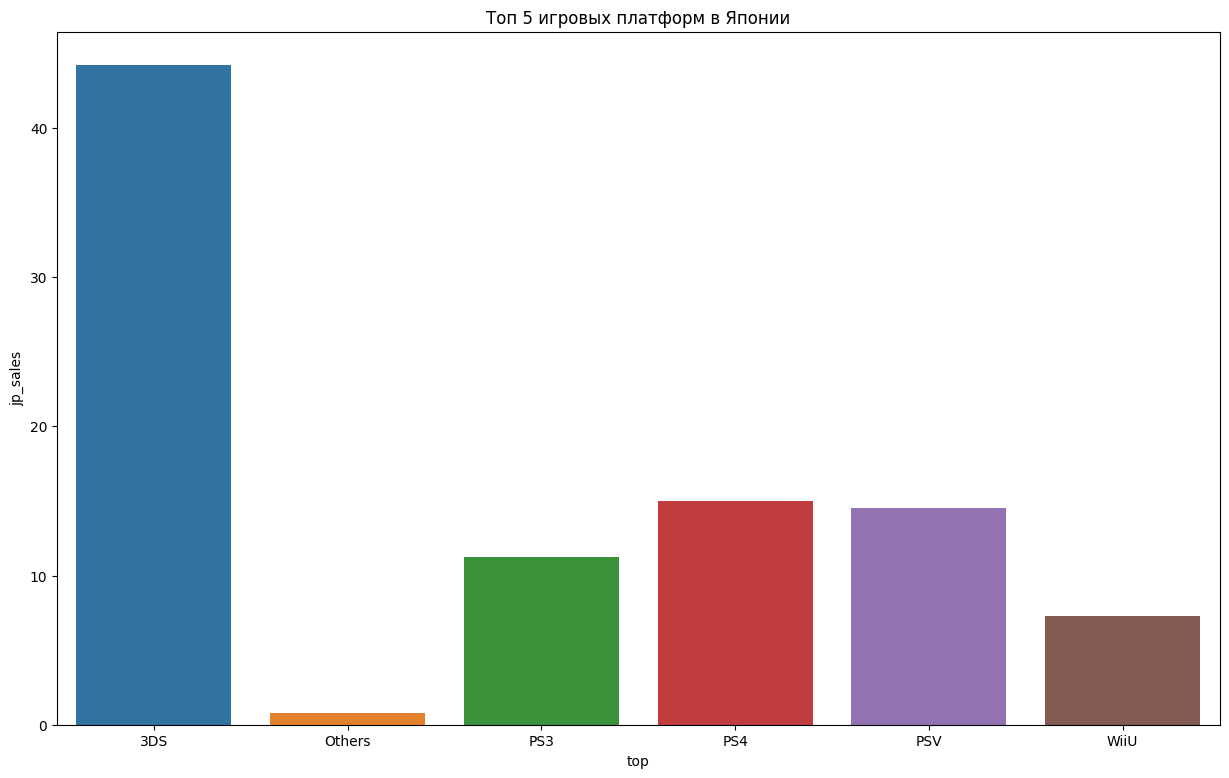

In [41]:
#Посмтрим распределение в Японии
jp_top_platforms = df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index()
jp_top_platforms = jp_top_platforms.sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
jp_top_platforms['top'] = jp_top_platforms['platform']
jp_top_platforms.iloc[5:, jp_top_platforms.columns.get_loc('top')] = 'Others'
jp_top_platforms = jp_top_platforms.groupby(by='top').agg({'jp_sales':sum}).reset_index()

#Нарисуем график
plt.figure(figsize=(15,9))
sns.barplot(data=jp_top_platforms, x='top', y='jp_sales')
#plt.pie(data=jp_top_platforms, x='jp_sales', labels='top', autopct='%0.f%%')
plt.title('Топ 5 игровых платформ в Японии');

В Японии свой индивидуальный топ по доле рынка: на первом месте, с большим отрывом '3DS', на втором 'PS4', на третьем 'PSV', на четвертом 'PS3' и на пятом 'WiiU'

**Вывод**

* В Северной Америке и Европе рейтинг по платформам похож, Япония имеет свой собственный топ
* Первое место в Северной Америке - 'PS4'
* Первое место в Европе - 'PS4'
* Первое место в Японии - '3DS'

Определим самые популярные жанры (топ-5) по регионам

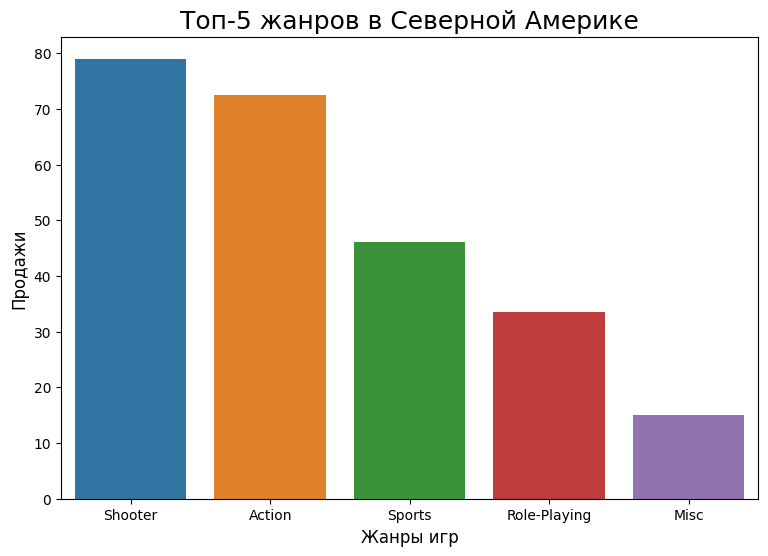

In [42]:
#Определеим топ-5 игр по Северной Америке
na_top_games = df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index()
na_top_games = na_top_games.sort_values(by='na_sales', ascending=False).reset_index(drop=True)
na_top_games = na_top_games.head()

#Отрисуем барплот
plt.figure(figsize=(9,6))
plt.title('Топ-5 жанров в Северной Америке', fontsize=18)
sns.barplot(data=na_top_games, x='genre', y='na_sales')
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Продажи', fontsize=12);

На первом месте в Северной Америке жанр 'Action', а на последнем 'Role-Playing'

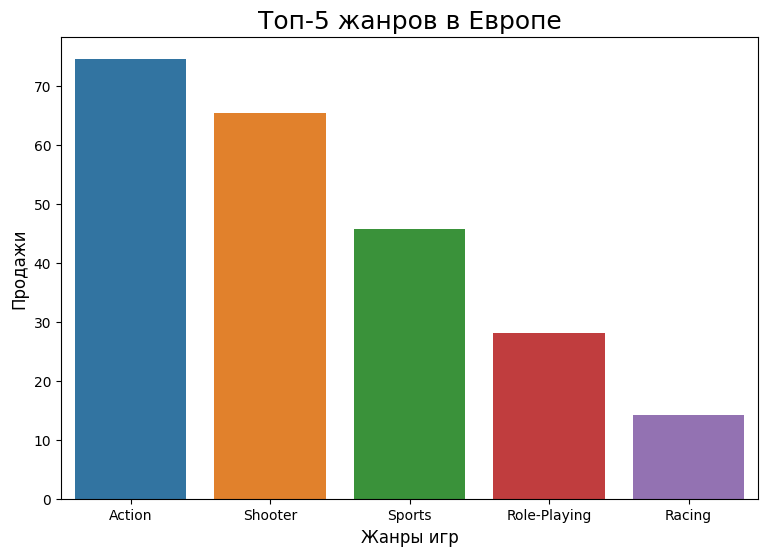

In [43]:
#Определеим топ-5 игр по Европе
eu_top_games = df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index()
eu_top_games = eu_top_games.sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
eu_top_games = eu_top_games.head()

#Отрисуем барплот
plt.figure(figsize=(9,6))
plt.title('Топ-5 жанров в Европе', fontsize=18)
sns.barplot(data=eu_top_games, x='genre', y='eu_sales')
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Продажи', fontsize=12);

В Европе картинка по жанрам очень похоже, только жанр 'Role-Playing' перешел на четверое место, а на последнем Misc  
Но как и в Северной Америке, там отличия небольшие, между четвертым и пятым местом

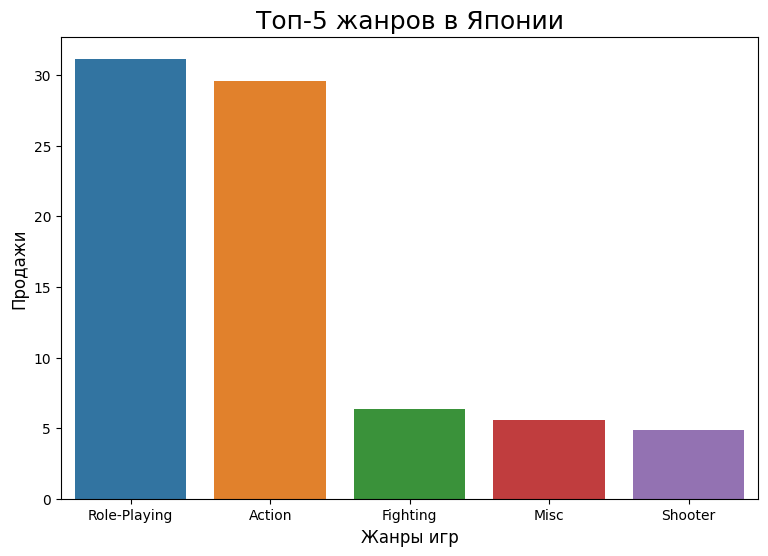

In [44]:
#Определеим топ-5 игр по Японии
jp_top_games = df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index()
jp_top_games = jp_top_games.sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
jp_top_games = jp_top_games.head()

#Отрисуем барплот
plt.figure(figsize=(9,6))
plt.title('Топ-5 жанров в Японии', fontsize=18)
sns.barplot(data=jp_top_games, x='genre', y='jp_sales')
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Продажи', fontsize=12);

А вот Япония по жанрам выделилась, картинка отличается от двух предыдущих регионов  
На первом месте жанр 'Role-Playing', который у других регионов не пользуется популярностью, а на последнем 'Shooter'  
В Европе и Северной Америке такой жанр не вошел в топ-5

**Вывод**

* В Европе и Северной Америке топ-5 жанров похожий, значит люди отдают в этих регионах одинаковые предпочтения
* Япония координально отличается по популярности жанров, на первом месте жанр, который у других регионов получает 4 и 5 место


Давайте проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе  
Для начала разберем, какие есть разделения в таблице: 

* M - Для взрослых 
* Е - Для всех
* T - Подросткам
* E10+ - Для всех от 10 лет и старше
* EC - Для детей младшего возраста
* RP - Ожидает присвоения рейтинга 

In [45]:
#Отсортируем по рейтингу продажи в Северной Америке
na_rating = df_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index()
na_rating = na_rating.sort_values(by='na_sales', ascending=False).reset_index(drop=True)
na_rating

,rating,na_sales
0,M,96.42
1,unknown,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


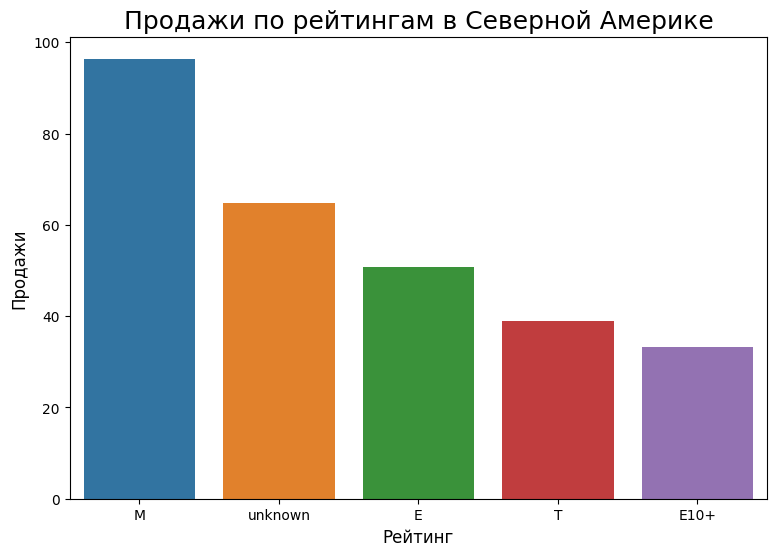

In [46]:
#Нарисуем график
plt.figure(figsize=(9,6))
plt.title('Продажи по рейтингам в Северной Америке', fontsize=18)
sns.barplot(data=na_rating, x='rating', y='na_sales')
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи', fontsize=12);

In [47]:
#Отсортируем по рейтингу продажи в Европе
eu_rating = df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index()
eu_rating = eu_rating.sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
eu_rating

,rating,eu_sales
0,M,93.44
1,unknown,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


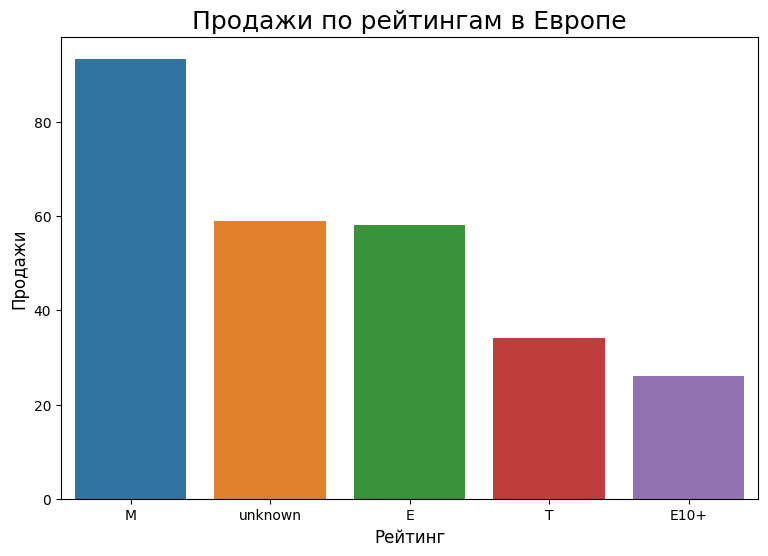

In [48]:
#Нарисуем график
plt.figure(figsize=(9,6))
plt.title('Продажи по рейтингам в Европе', fontsize=18)
sns.barplot(data=eu_rating, x='rating', y='eu_sales')
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи', fontsize=12);

In [49]:
#Отсортируем по рейтингу продажи в Европе
jp_rating = df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index()
jp_rating = jp_rating.sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
jp_rating

,rating,jp_sales
0,unknown,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


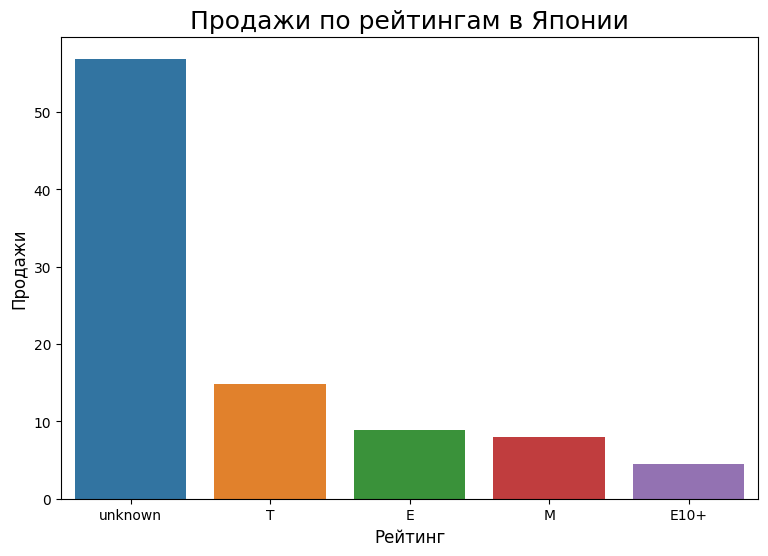

In [50]:
#Нарисуем график
plt.figure(figsize=(9,6))
plt.title('Продажи по рейтингам в Японии', fontsize=18)
sns.barplot(data=jp_rating, x='rating', y='jp_sales')
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи', fontsize=12);

**Вывод**

* В Северной Америке и Европе, есть четкая тенденция по рейтингу, она похоже: на первом месте рейтинг 'M'
* Япония здесь тоже отличилась, видимо, эта система в Японии не популярна и большая часть игр без рейтинга

##  Проверка гипотез

Проверим первую гипотезу, она звучит так: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Сформулируем нулевую гипотезу:** Средние пользовательские рейтинги платформы Xbox One равны PC  
**Сформулируем альтернативную гипотезу:** Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [51]:
#Проведем t-test
xone = df_actual.query('platform == "XOne"')
xone = xone.query('user_score != -1')['user_score']

pc = df_actual.query('platform == "PC"')
pc = pc.query('user_score != -1')['user_score']

alpha = 0.05 #критический уровень статистической значимости
result_platform = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', result_platform.pvalue)

if result_platform.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Значение p-value достаточно высокое - 98%, поэтому гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые мы не отвергаем

Проверим следующую гипотезу, она звучит так: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Сформулируем нулевую гипотезу:** Средние пользовательские рейтинги жанров Action и Sports равны  
**Сформулируем альтернативную гипотезу:** Средние пользовательские рейтинги жанров Action и Sports разные

In [52]:
#Проведем t-test
action = df.query('genre == "Action"')
action = action.query('user_score != -1')['user_score']

sports = df.query('genre == "Sports"')
sports = sports.query('user_score != -1')['user_score']

alpha = 0.05 #критический уровень статистической значимости
result_genre = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', result_genre.pvalue)

if result_genre.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


Вторую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные мы отвергаем, так как нулевую гипотезу отвергнуть не получилось

**Вывод**
1. Критерий *alpha = 0.05* был задан исходя из общепринятых пороговых значений (5% и 1%)
2. Нулевая и альтернативная гипотезы сформулированы исходя из: 

     - нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства;
     - альтернативная гипотеза была сформулирована с учетом того, что нас интересует.
     

## Вывод

Нам нужно было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

Перед исследованием мы проработали данные: привели к правильному стилю, заменили пропуски на специальные символы и преобразовали тип данных  
Причина пропусков может быть простая: у игры нет оценок от критика или пользователя - получается пропуск, в ситуации с рейтингом - у игры может не быть рейтинга, поэтому тоже получается пропуск

В данных выделяются 3 явных этапа развития индустрии: рост до 2008 года, пик 2008 и 2009 годов, а также сокращение рынка последних годов.  

Мы выяснили, что средняя жизнь у платформ на рынке состовляет порядка **8-10 лет**

Дальнейшее исследование делали по актуальному периоду, мы взяли *3 последний года*

Больше всего продаж игр было для платформы **PS4**  
Также укажем тройку лидеров за актуальный период: **PS4, Xone и WiiU**

**По оценкам сделали выводы:**

- Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. 
- Оценки пользователей корреляции с продажами не имеют

Мы определили, какой жанр приносит больше всего продаж, взяли мединное значение - это **Shooter**

**Выяснили самые популярные платформы по регионам:**

- В Серевной Америке и Европе - это **PS4**
- В Японии - **3DS**

**Также определили самый популярный жанр по регионам:**

- В Северной Америке - **Shooter**
- В Европе - **Action**
- В Японии - **Role-Playing**

**Вывод по рейтингу:**

- В Северной Америке и Европе, есть четкая тенденция по рейтингу, она похоже: на первом месте рейтинг **'M'**
- Япония здесь тоже отличилась, видимо, эта система в Японии не популярна и большая часть игр без рейтинга. В Японии есть своя система рейтинга

**Мы проверили 2 гипотезы, они звучали так:**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Первую гипотезу отвергнуть не получилось 
Вторую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные мы отвергаем, так как нулевую гипотезу отвергнуть не получилось